Text(0, 0.5, 'package(in LPA)')

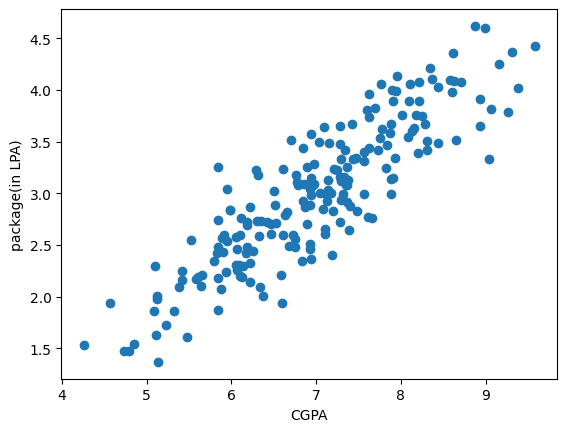

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('placement.csv')
# df.head()

plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('package(in LPA)')

Text(0, 0.5, 'package(in LPA)')

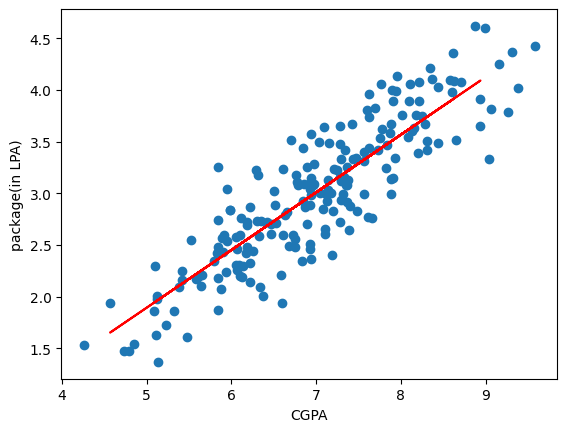

In [3]:
## Dividing x and y as i/p and o/p cols
x = df.iloc[:, 0:1]
y = df.iloc[:, -1]

## Dividing data into training and testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# print(df.head())
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

## training the model using traning datasets
lr.fit(x_train, y_train)

## reshaping because it expects 1x1 data and not 1D data
# lr.predict(x_test.iloc[0].values.reshape(1, 1))


## plots the graph and the fitted lne
plt.scatter(df['cgpa'], df['package'])
plt.plot(x_test, lr.predict(x_test), color="red")
plt.xlabel('CGPA')
plt.ylabel('package(in LPA)')

In [21]:
# CALCULATING ALL THE FOUR PARAMETERS

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = lr.predict(x_test)

print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

## cgpa is able to explain 78% of the variance in lpa
print("r2_score", r2_score(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

# print(y_test.shape)

adj_r2 = 1 - ((1 - r2)*(40 - 1)/ (40 - 1 - 1))
print("adj_r2", adj_r2)

MAE 0.28793436323294697
MSE 0.12189894531902375
RMSE 0.3491402946080898
r2_score 0.7796335624802128
adj_r2 0.7738344457033762


Text(0, 0.5, 'package(in LPA)')

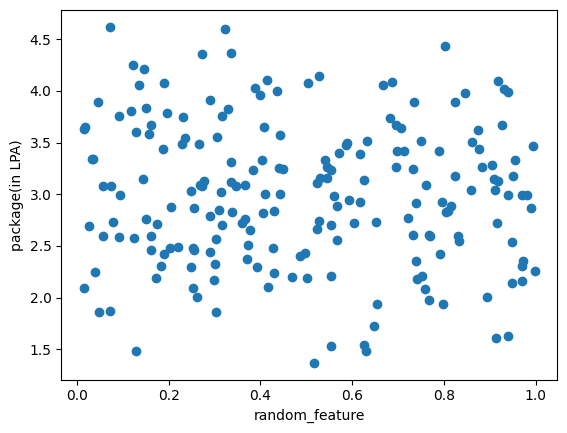

In [18]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa', 'random_feature', 'package']]

new_df1.head()

plt.scatter(new_df1['random_feature'], new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('package(in LPA)')


In [25]:
# CALCULATING R2 AND ADJ_R2 AFTER ADDING AN IRRELEVANT COLUMN

## Dividing x and y as i/p and o/p cols
x = new_df1.iloc[:, 0:2]
y = new_df1.iloc[:, -1]

## Dividing data into training and testing datas    ets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# print(df.head())
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

## training the model using traning datasets
lr.fit(x_train, y_train)

## reshaping because it expects 1x1 data and not 1D data
# lr.predict(x_test.iloc[0].values.reshape(1, 1))

y_pred = lr.predict(x_test)

# adj_r2 will decrease as this new random feature does not contribute to this but r2 remained the same

r2 = r2_score(y_test, y_pred)
print("r2", r2)

adj_r2 = 1 - ((1 - r2)*(40 - 1)/ (40 - 1 - 2))
print("adj_r2", adj_r2)

r2 0.7796335624802128
adj_r2 0.7677218631548188
